In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_csv("papp_krizan.csv", sep=';',index_col=0)
data.head()

,time,iter,thr,nproc
id,,,,
1,0.080031,100,1,1
2,0.076101,100,1,1
3,0.076822,100,1,1
4,0.076019,100,1,1
5,0.075215,100,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 1 to 677
Data columns (total 4 columns):
time     677 non-null float64
iter     677 non-null int64
thr      677 non-null int64
nproc    677 non-null int64
dtypes: float64(1), int64(3)
memory usage: 26.4 KB


# Opis riešenia

Na vypracovanie sme použili julia set fraktál, pracovali sme s MPI kde sme rozdelili vykreslovanie fraktálu po riadkoch. Ako nultý index riadku to znamena ten ktorý nezobrazuje glut sme používali informáciu pre mastra aká je y-psilonova súradnica práve spracovaného riadku. Ofarboval som nahdone podla matice farieb zo stackowerflow. N-ko predčasne skončený vykreslovací julia set cyklus sme použili ako určovaciu premenu ofarbenia.

# Datova analyza Julia's sets

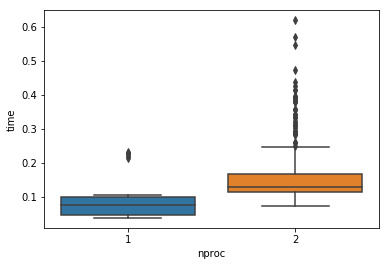

In [4]:
sns.boxplot(x="nproc", y="time", data=data)

Z grafu môžme vidieť, že zvýšením poštu procesorov a použitím MPI sa zvýšil rendrovací čas.

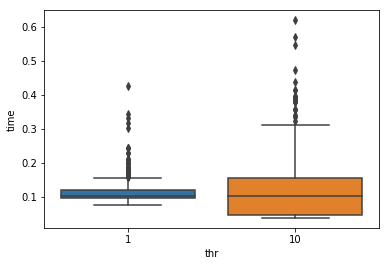

In [5]:
sns.boxplot(x="thr", y="time", data=data)

Z grafu môžme vidieť, že použitím omp 10 threadov sa rendrovaci čas moc nezmenil

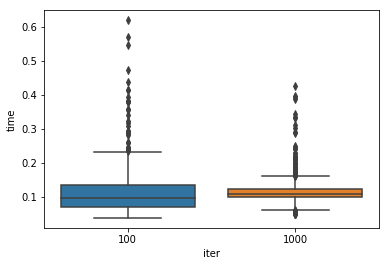

In [6]:
sns.boxplot(x="iter", y="time", data=data)

Z grafu môžme vidieť že normálny čas rendrovania 100 a 1000 iterácii Julia setu je približne rovnaký

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


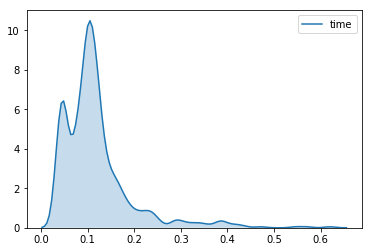

In [7]:
sns.kdeplot(data['time'].dropna(), shade=True);

Z grafu vidíme že najviac percent hodnout je okolo času 0.09 -0.12 sekundy

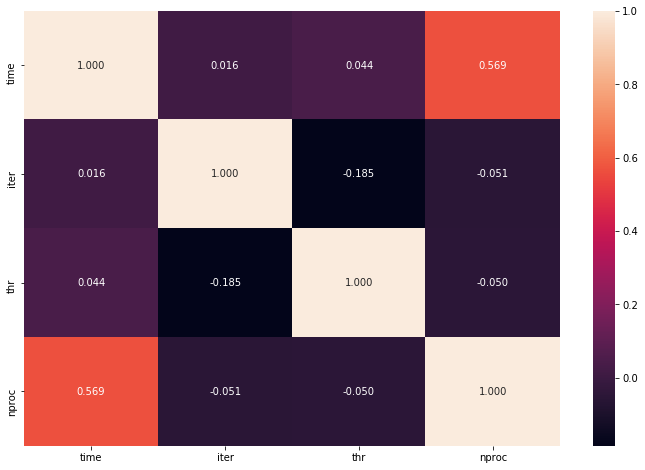

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

Vidíme, že hodnoty time a nproc spolu kladne korelujú, to znamená že čím je väčší počet procesorov, tým by mal byť vyšší rendrovací čas vychádza to cca v pomere 1:2.

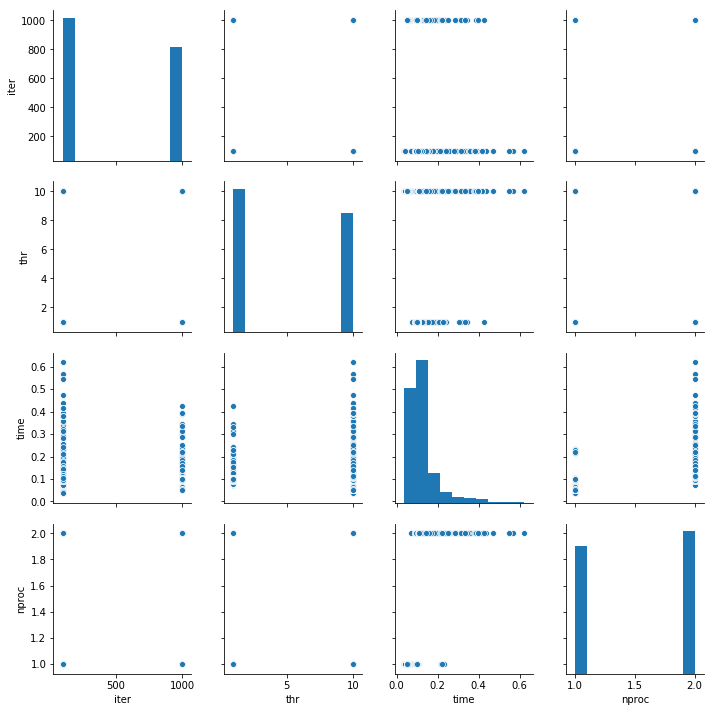

In [9]:
_ = sns.pairplot(data[['iter','thr','time','nproc']].dropna())

Môžeme vidieť anomálie datasetu, ako napríklad rendrovací čas nad 0.5 sekundy pri dvoch procesoroch ale 10 Threadoch.